In [1]:
import keras,os,tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

img_width=150
img_height=150

batch_size = 30
epochs = 20
#nb_train_samples = 3684
#nb_validation_samples = 3684


# 훈련 데이터 데이터 구성 및 자동 생성기 만들기  

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

trdata_gen = ImageDataGenerator(
                               rescale=1. / 255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)
traindata = trdata_gen.flow_from_directory(train_data_dir,target_size=(img_width,img_height))

#tsdata = ImageDataGenerator(rescale=1. / 255)

#testdata = tsdata.flow_from_directory(train_data_dir, target_size=(224,224))

valdata_gen = ImageDataGenerator(rescale=1. / 255)
valdata = valdata_gen.flow_from_directory(validation_data_dir, target_size=(img_width,img_height))


2025-01-13 11:21:59.535149: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 11:21:59.546990: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 11:21:59.550714: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 11:21:59.560017: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 11:22:00.198146: W tensorflow/compiler/tf2

Found 3684 images belonging to 2 classes.
Found 3665 images belonging to 2 classes.


In [2]:
# vgg16 모델 생성
# Embedding 출력에 사용하 기위하여 마지막 분류(output)레이어 윗 레이어 이름을 "embedding"으로 지정

# initialize the model
#2 x convolution layer of 64 channel of 3x3 kernel and same padding.
#1 x maxpool layer of 2x2 pool size and stride 2x2.
#.2 x convolution layer of 128 channel of 3x3 kernel and same padding.
#1 x maxpool layer of 2x2 pool size and stride 2x2.
#3 x convolution layer of 256 channel of 3x3 kernel and same padding.
#1 x maxpool layer of 2x2 pool size and stride 2x2.
#3 x convolution layer of 512 channel of 3x3 kernel and same padding.
#1 x maxpool layer of 2x2 pool size and stride 2x2.
#3 x convolution layer of 512 channel of 3x3 kernel and same padding.
#1 x maxpool layer of 2x2 pool size and stride 2x2.

model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# added the rectified linear unit (ReLU) activation
model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dropout(0.5, name="embedding"))
model.add(Dense(units=2, activation="softmax",name="output"))

# Compile the model

from keras.optimizers import Adam
learning_rate = 0.001
opt = Adam(learning_rate)
#model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['acc'])
model.summary()


/home/dev01/Python-3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,610 (64.14 MB)

 Trainable params: 16,812,610 (64.14 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# 모델 훈련
hist = model.fit(traindata, epochs=epochs, batch_size=batch_size, validation_data = valdata)
print("Done fit")

Epoch 1/20


/home/dev01/Python-3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 1181s 10s/step - acc: 0.5117 - loss: 0.8601 - val_acc: 0.5302 - val_loss: 0.6918
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 1182s 10s/step - acc: 0.5483 - loss: 0.6910 - val_acc: 0.5302 - val_loss: 0.6920
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 1181s 10s/step - acc: 0.5340 - loss: 0.6917 - val_acc: 0.5302 - val_loss: 0.6914
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 1174s 10s/step - acc: 0.5268 - loss: 0.6922 - val_acc: 0.5302 - val_loss: 0.6914
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 1187s 10s/step - acc: 0.5240 - loss: 0.6923 - val_acc: 0.5302 - val_loss: 0.6913
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 1185s 10s/step - acc: 0.5331 - loss: 0.6911 - val_acc: 0.5302 - val_loss: 0.6913
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 1183s 10s/step - acc: 0.5468 - loss: 0.6895 - val_acc: 0.5302 - val_loss: 0.6913
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 1182s 10s/step - acc: 0.5278 - loss: 0.6919 - val_acc: 0.5302 - val_loss: 0.6913
Epoch 9/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 118

In [4]:
# 모델 저장
filepath = 'save/vgg16_1.keras'
weightpath = 'save/vgg16_1.weights.h5'

model.save(filepath)
model.save_weights(weightpath)
print("saved model")

saved model


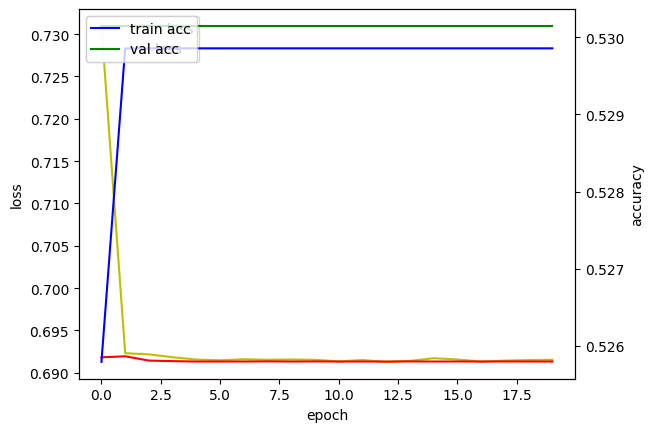

In [5]:

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
